# Grip April 23' Task 2
Name: T.S.Akhilesh
Email: tsakhilesh12@gmail.com

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Applying clustering on the dataset

In [5]:
x = df.iloc[:,[1,2,3,4]].values

In [6]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

## Finding number of clusters using Elbow method

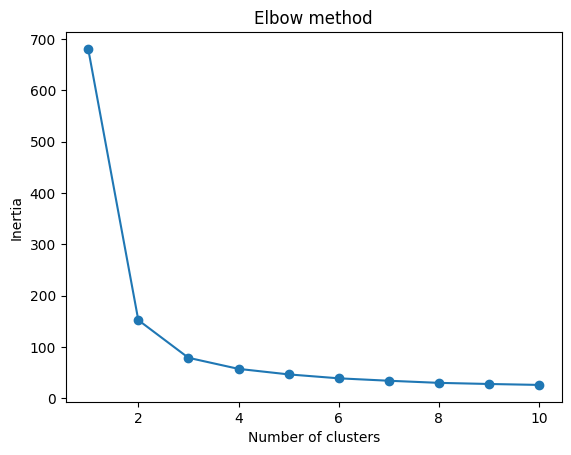

In [7]:
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=3,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0)
y_kmeans = kmeans.fit_predict(x)

## Plotting of scatterplot

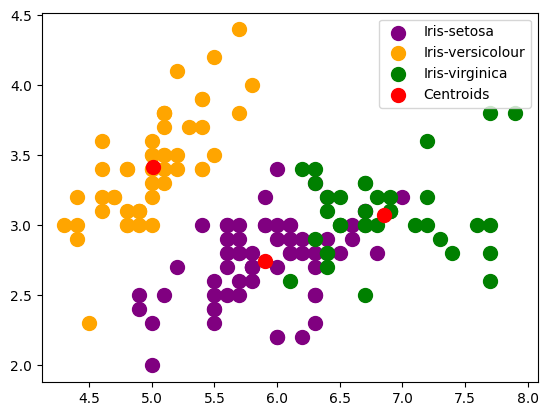

In [9]:
plt.scatter(x[y_kmeans == 0,0],
            x[y_kmeans == 0,1],
            s=100, c='purple',
            label='Iris-setosa')
plt.scatter(x[y_kmeans == 1,0],
            x[y_kmeans == 1,1],
            s=100, c='orange',
            label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0],
            x[y_kmeans == 2,1],
            s=100, c='green',
            label='Iris-virginica')
  
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=100, c='red',
            label='Centroids')
  
plt.legend()
plt.show()

## Using dendograms to find optimal number of clusters

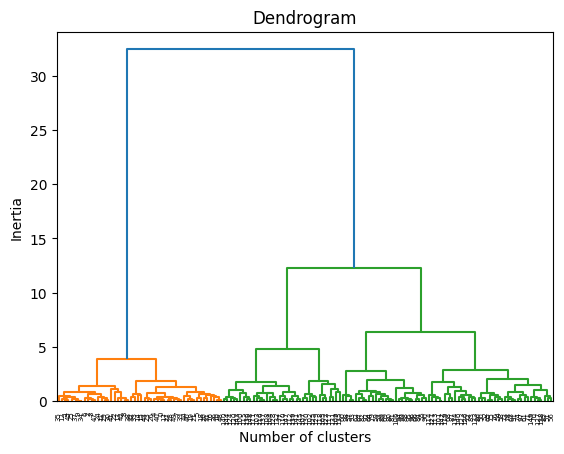

In [10]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

C:\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


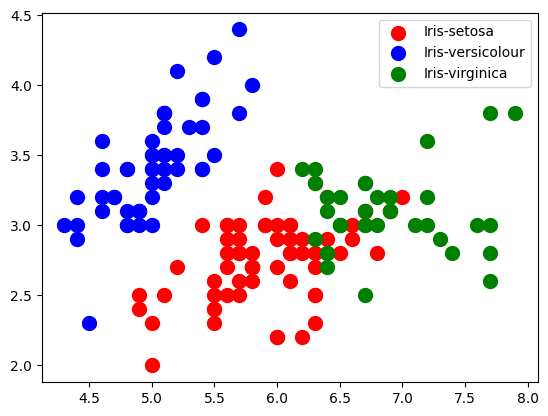

In [15]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.legend()
plt.show()